In [1]:
#1
def Mean(thelist):
    y = 0
    N = len(thelist)
    for x in thelist:
        y = y + x 
    mean = y/N
    return mean

In [2]:
import numpy as np
temp = np.loadtxt("weatherstats_vancouver_daily.csv", delimiter = ",", usecols=(4),skiprows=(1))

print("My temp mean : %5.3f" %Mean(temp))
print("True temp mean : %5.3f" %np.mean(temp))

temp 7.101
temp 7.101


In [3]:
#3
def SD(List):
    total = 0.0
    totalsq = 0.0
    va = 0
    sd = 0
    N = len(List)
    
    for x in List:
        total = total + x
        totalsq = totalsq + (x * x)
        
    va = (1/(N-1)) * (totalsq - ((total * total)/N))
    sd = va**0.5
    return sd

In [4]:
import matplotlib.pyplot as plt
print("My standard diviation %5.3f" %SD(temp))
print("Truwstandard diviation %5.3f" %np.std(temp,ddof=1))

standard diviation 5.528
standard diviation 5.528


In [5]:
#3
import matplotlib.pyplot as plt

def Histro(List,Min,Max,Bins,One):
    bin_L = [0]*Bins #generate arrays for holding data
    bin_H = [0]*Bins
    total = 0
    count = 0
    count1 = 0
    
    bin_size = (Max - Min)/Bins #size of the bin
    
    while count < Bins:
        bin_L[count] = Min + bin_size*count
        for x in List:
            if x > (Min + bin_size*count) and x < (Min + bin_size*(count+1)):
                bin_H[count] += 1
        count = count + 1
                
    if One == True:
        for a in bin_H:
            total = a + total
        for a in bin_H:
            
             bin_H[count1]= a/total
             count1 = count1 + 1    
            
            
    plt.plot(bin_L,bin_H)
    
    return 
        
    

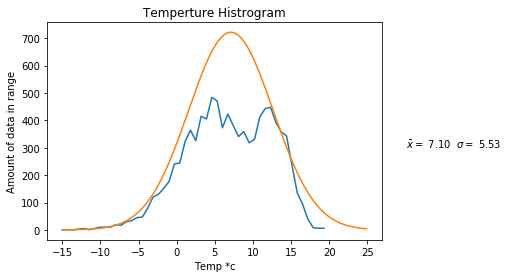

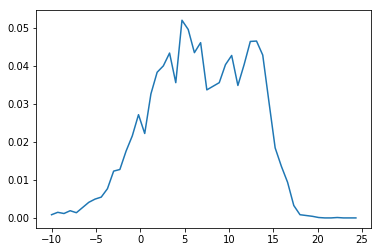

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
Histro(temp,-15,20,50,False)
plt.xlabel("Temp *c"), plt.ylabel("Amount of data in range"), plt.title("Temperture Histrogram")

plt.text(30, 300, r'$\bar{x}=$%5.2f  $\sigma=$%5.2f' %(Mean(temp),SD(temp)))
x_axis = np.arange(-15,25,0.1)
plt.plot(x_axis,len(temp)* norm.pdf(x_axis,np.mean(temp),np.std(temp)))

plt.show()
Histro(temp,-10,25,50,True)
plt.show()


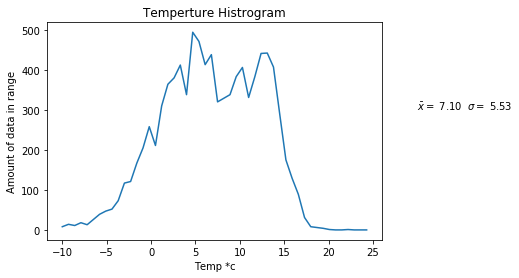

In [7]:
fig, ax = plt.subplots() #make plot a subplot to save
Histro(temp,-10,25,50,False)
plt.xlabel("Temp *c"), plt.ylabel("Amount of data in range"), plt.title("Temperture Histrogram")
plt.text(30, 300, r'$\bar{x}=$%5.2f  $\sigma=$%5.2f' %(Mean(temp),SD(temp)))
plt.show()

fig.savefig('TempHistrogram.eps', format ='eps', dpi = 1000) #format and save

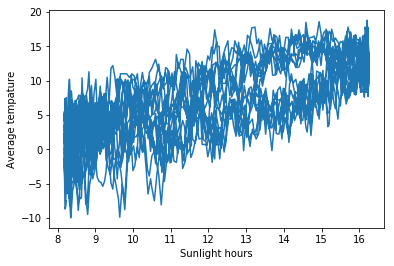

In [8]:
# 4

import matplotlib.pyplot as plt
import numpy as np

datarise, dataset = np.genfromtxt("weatherstats_vancouver_daily.csv", delimiter=",", usecols=(45,46),dtype='str',unpack=True)


riselist=datarise.tolist() # I'm only saving the rise times here, but you'll need the set ones too
setlist=dataset.tolist()

delimiter2 = ':'

hours=[0.]*(3000)
mins=[0.]*(3000)
sec=[0.]*(3000)

i=1

while i<=3000:

    
    time=riselist[i].split(delimiter2)
    hours[i-1]=list(map(float, time[0:1]))
    mins[i-1]=list(map(float, time[1:2]))
    sec[i-1]=list(map(float, time[2:3]))
    
    i+=1

mins = np.divide(mins,60.)
sec = np.divide(sec,3600.)
time = np.add(hours,mins,sec)  #adding hours to mins to sec to give a float version of time

hours1=[0.]*(3000)
mins1=[0.]*(3000)
sec1=[0.]*(3000)
i=1

while i<=3000:

    
    time1=setlist[i].split(delimiter2)
    hours1[i-1]=list(map(float, time1[0:1]))
    mins1[i-1]=list(map(float, time1[1:2]))
    sec1[i-1]=list(map(float, time1[2:3]))
    
    i+=1
mins1 = np.divide(mins1,60.)
sec1 = np.divide(sec1,3600.)
time1 = np.add(hours1,mins1,sec1)  #adding hours to mins to sec to give a float version of time

suntime = np.subtract(time1,time)

plt.plot(suntime,temp[0:3000])
plt.xlabel('Sunlight hours')
plt.ylabel('Average tempature')
plt.show()

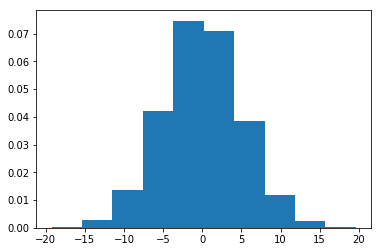

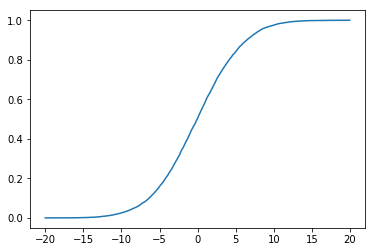

In [9]:
#5 a - c
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

set1 = np.random.normal(0,5,10000)
plt.hist(set1,bins=10,density=True)
plt.show()
#Repurpose the Histrogram function
def CDF(List,Min,Max,Bins):

    bin_L = [0]*Bins #generate arrays for holding data
    bin_H = [0]*Bins
    total = 0
    count = 0
    count1 = 0
    
    bin_size = (Max - Min)/Bins #size of the bin
    
    while count < Bins:
        bin_L[count] = Min + bin_size*count
        for x in List:
            if  x < (Min + bin_size*(count+1)): #Cumlutive addition
                bin_H[count] += 1
        count = count + 1
                

    for a in bin_H:
        bin_H[count1]= a/len(List)
        count1 = count1 + 1    
            
            
    plt.plot(bin_L,bin_H)
    
    return bin_H, bin_L
               
sizeH,sizeL = CDF(set1,-20,20,1000)
plt.show()


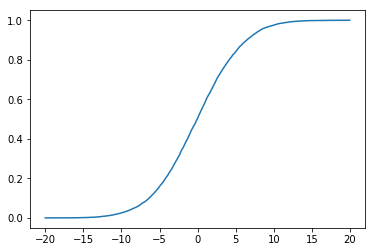

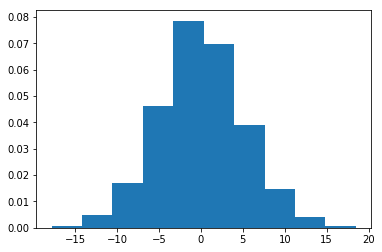

In [25]:
#5 e -f
U = np.random.uniform(0.0,1.0,10000)
sizeH,sizeL =  CDF(set1,-20,20,1000)
plt.show()
out=[]

i = 1

while i <= len(sizeH) :
    for x in U:
        if (x >= sizeH[i-1]) and (x <=sizeH[i+1]):
            out.append(sizeL[i])
    i+=1


plt.hist(out,bins=10,density=True)

plt.show()

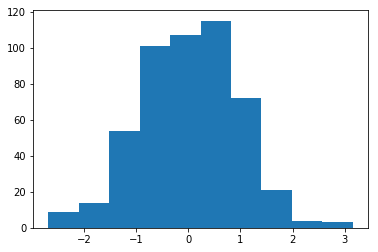

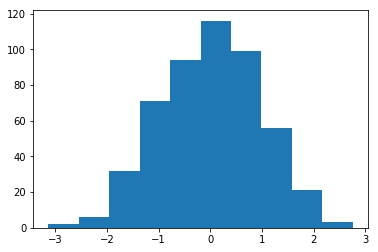

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def BXTrans(u1,u2):
    z1=np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2=np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1, z2

U1 = np.random.uniform(0.0,1,500)
U2 = np.random.uniform(0.0,1,500)

Z1,Z2=BXTrans(U1,U2)

plt.title('Box-Muller')
plt.hist(Z1)
plt.show()
x=np.random.normal(0,1,500)
plt.title('Random Normal')
plt.hist(x)
plt.show()